# TRABAJO SEMANAL 4bis
> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas </u>  ##

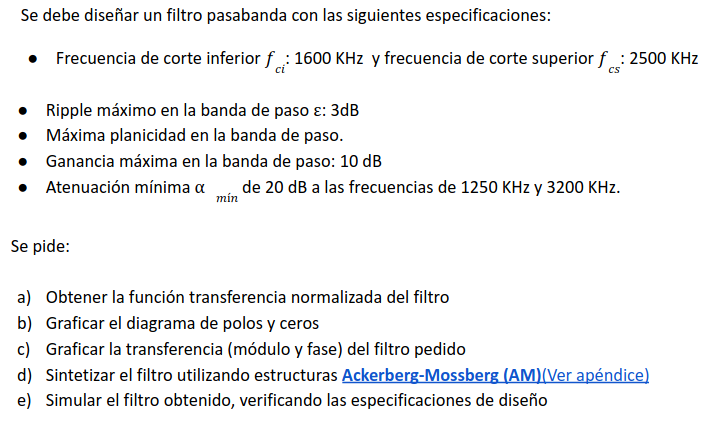

## <u> Desarrollo </u>  ##
Se adjunta un pdf con la solución de las consignas.

In [1]:
from IPython.display import IFrame
IFrame("./TS4bis_TC2_R4001-FabrizioHermosa.pdf", width=900, height=1000)

## Simulación numérica en python ##

In [2]:
# importo librerias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#libreria de la catedra
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_SOS, tf2sos_analog
from pytc2.general import print_subtitle
pi = np.pi
# Plantilla
fp1 = 1600e3
fp2 = 2500e3
fs1 = 1250e3 
fs2 = 3200e3
alpha_max = 3
alpha_min = 20
Kdb = 10 #ganancia max banda de paso
K = 10**(Kdb/20) #paso a veces

In [3]:
##Desarollo
fo = np.sqrt(fp1*fp2)
print(f'Frecuencia central fo = {fo}')

#Normalizacion de frecuencias
norma_w = 2*pi*fo
w_o_n = 1

w_p1_n = 2*pi*fp1/norma_w
print(f'w_p1_n = {w_p1_n}')
w_p2_n = 2*pi*fp2/norma_w
print(f'w_p2_n = {w_p2_n}')

w_s1_n = 2*pi*fs1/norma_w
print(f'w_s1_n = {w_s1_n}')
w_s2_n = 2*pi*fs2/norma_w
print(f'w_s2_n = {w_s2_n}')

Frecuencia central fo = 2000000.0
w_p1_n = 0.7999999999999999
w_p2_n = 1.2500000000000002
w_s1_n = 0.6250000000000001
w_s2_n = 1.5999999999999999


In [4]:
#Calculo de BW y Q
BW = w_p2_n - w_p1_n
Q = w_o_n/BW

print(f'Ancho de banda = {BW}')
print(f'Q = {Q}')

#Nucleo de transformación para pasabajos prototipo
ohm_p1 = Q * (w_p1_n**2 - 1)/w_p1_n
print(f'Omega_p1_n = {ohm_p1}')

ohm_p2 = Q * (w_p2_n**2 - 1)/w_p2_n
print(f'Omega_p2_n = {ohm_p2}')

ohm_s1 = Q * (w_s1_n**2 - 1)/w_s1_n
print(f'Omega_s1_n = {ohm_s1}')
ohm_s2 = Q * (w_s2_n**2 - 1)/w_s2_n
print(f'Omega_s2_n = {ohm_s2}')

Ancho de banda = 0.4500000000000003
Q = 2.222222222222221
Omega_p1_n = -0.9999999999999999
Omega_p2_n = 1.0000000000000004
Omega_s1_n = -2.1666666666666643
Omega_s2_n = 2.166666666666665


In [5]:
Ohm_s = ohm_s2
#LPF MP prototipo
eps = np.sqrt(10**(alpha_max/10) - 1)
print(f'Epsilon = {eps}, aproximadamente 1 -> BUTTERWORTH')

orden = np.ceil(0.5*(np.log10((10**(alpha_min*0.1) - 1)/ eps**2) / np.log10(Ohm_s)))
print(f'De orden = {orden}')

z, p, k = sig.buttap(orden) #polos y ceros de un Butterworth de este orden
num, den = sig.zpk2tf(z,p,k) #numerador y denominador de la transferencia

Epsilon = 0.9976283451109834, aproximadamente 1 -> BUTTERWORTH
De orden = 3.0


#### Transferencia en SOS del BPF Butterworth

<IPython.core.display.Math object>

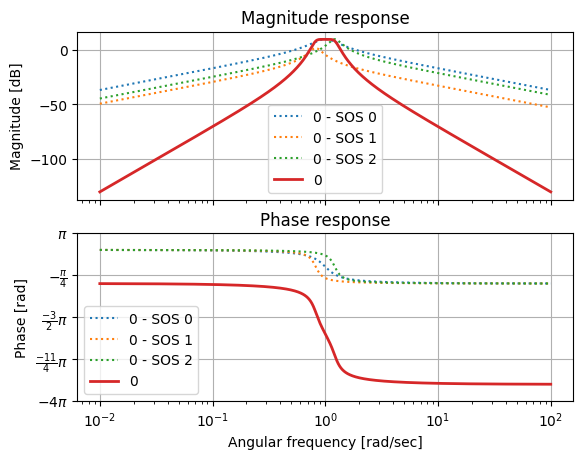

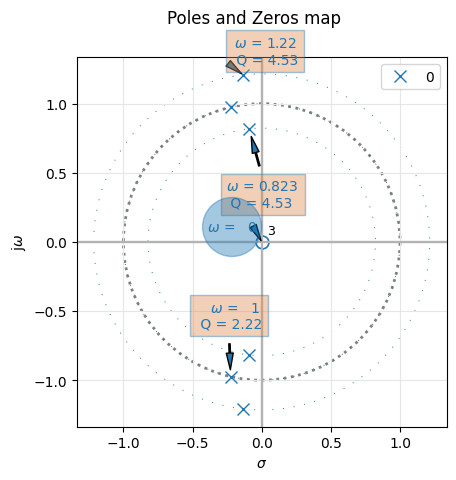

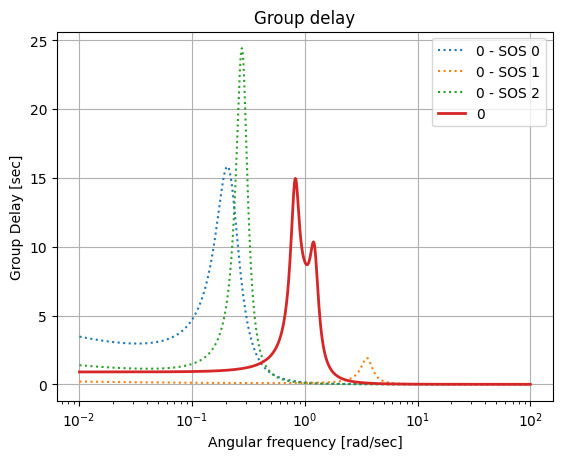

In [6]:
#Paso a BPF
#%matplotlib qt5
num2, den2 = sig.lp2bp(num*K, den, w_o_n, BW) # multiplico el numerador por la ganancia
sos_bp = tf2sos_analog(num2, den2)
sos_bp[sos_bp < 1e-6] = 0.0
print_subtitle("Transferencia en SOS del BPF Butterworth") #BPF: band pass filter
pretty_print_SOS(sos_bp) 
analyze_sys(sos_bp)

## Simulación circuital en LTspice ## 

A continuación se implementaron las estructuras activas Ackerberg-Mossberg en la siguiente disposición:

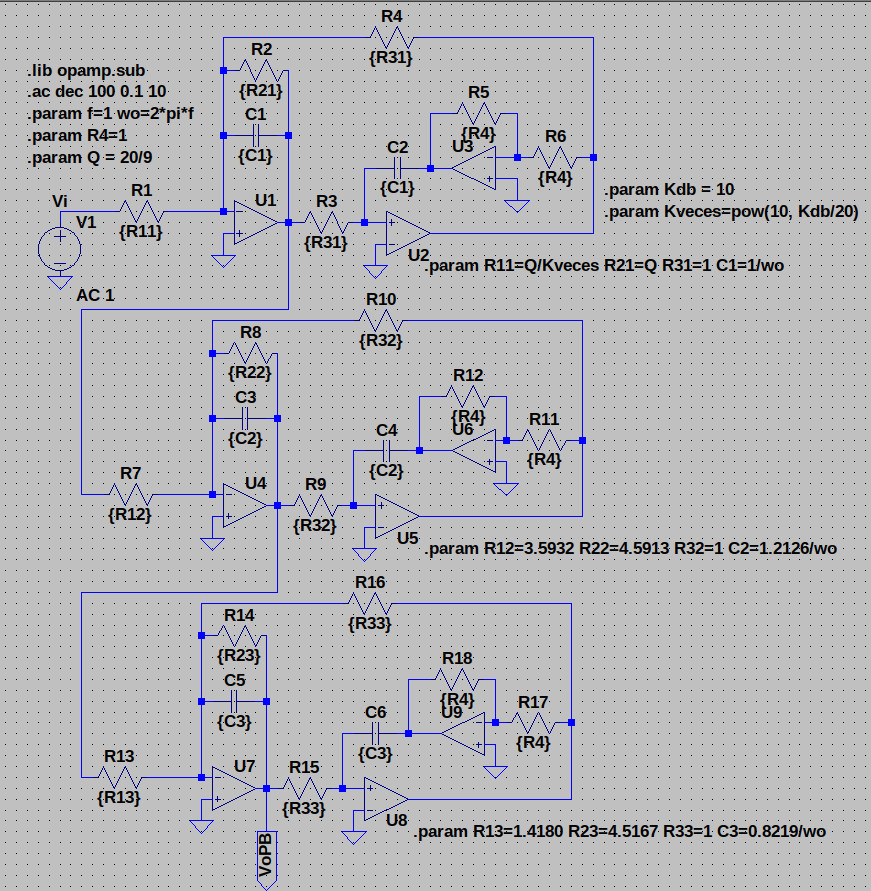

Mediciones en la banda de paso:

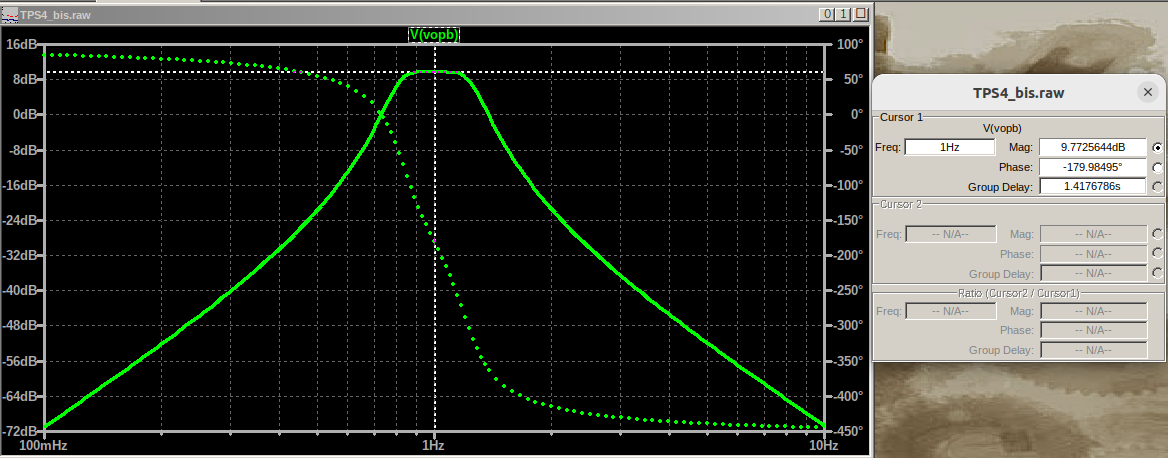

Mediciones en las frecuencias (normalizadas) de paso, $w_{p1}' = 0.8$ y $w_{p2}' = 1.25$

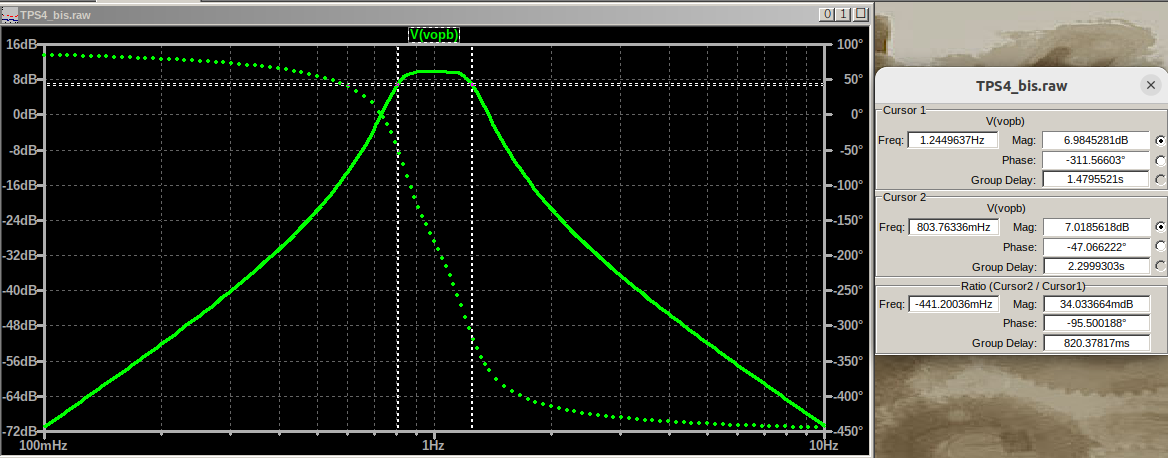

Mediciones en las frecuencias (normalizadas) de paso, $w_{s1}' = 0.625$ y $w_{s2}' = 1.6$

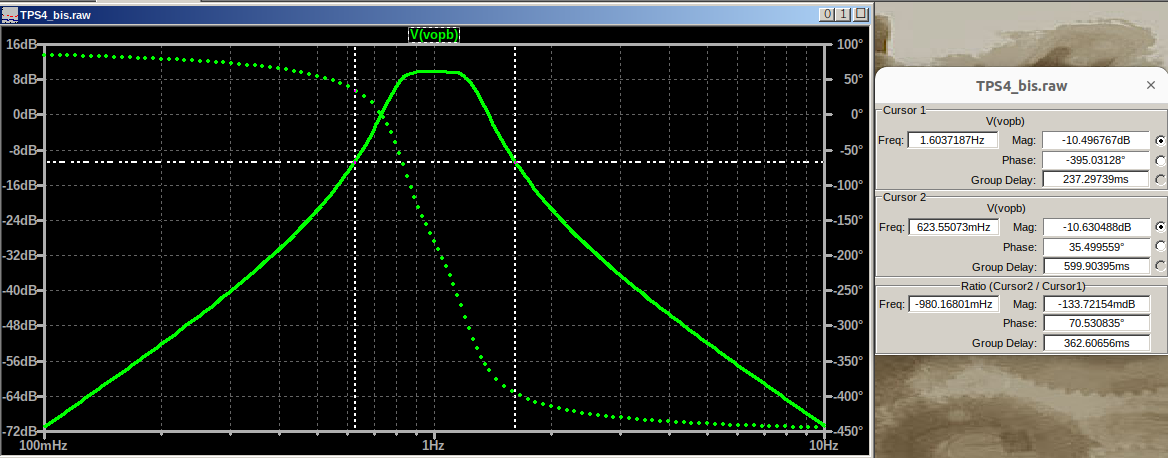

## <u> Conclusiones </u> ##

Se aprendió que para implementar un pasabanda de orden 3 se necesitaron 3 SOS pasabanda de orden 2 en cascada, es decir un sistema de 6 polos y un cero de orden 3.

Es de recalcar que se redondearon los valores de los componentes para simplificar algunos cálculos y por eso la simulación circuital cumple pero no exactamente con la plantilla. 